# Classifying years with/without volcanic activity impact on temperature


In [62]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import cartopy.crs as ccrs
import cartopy
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from itertools import groupby

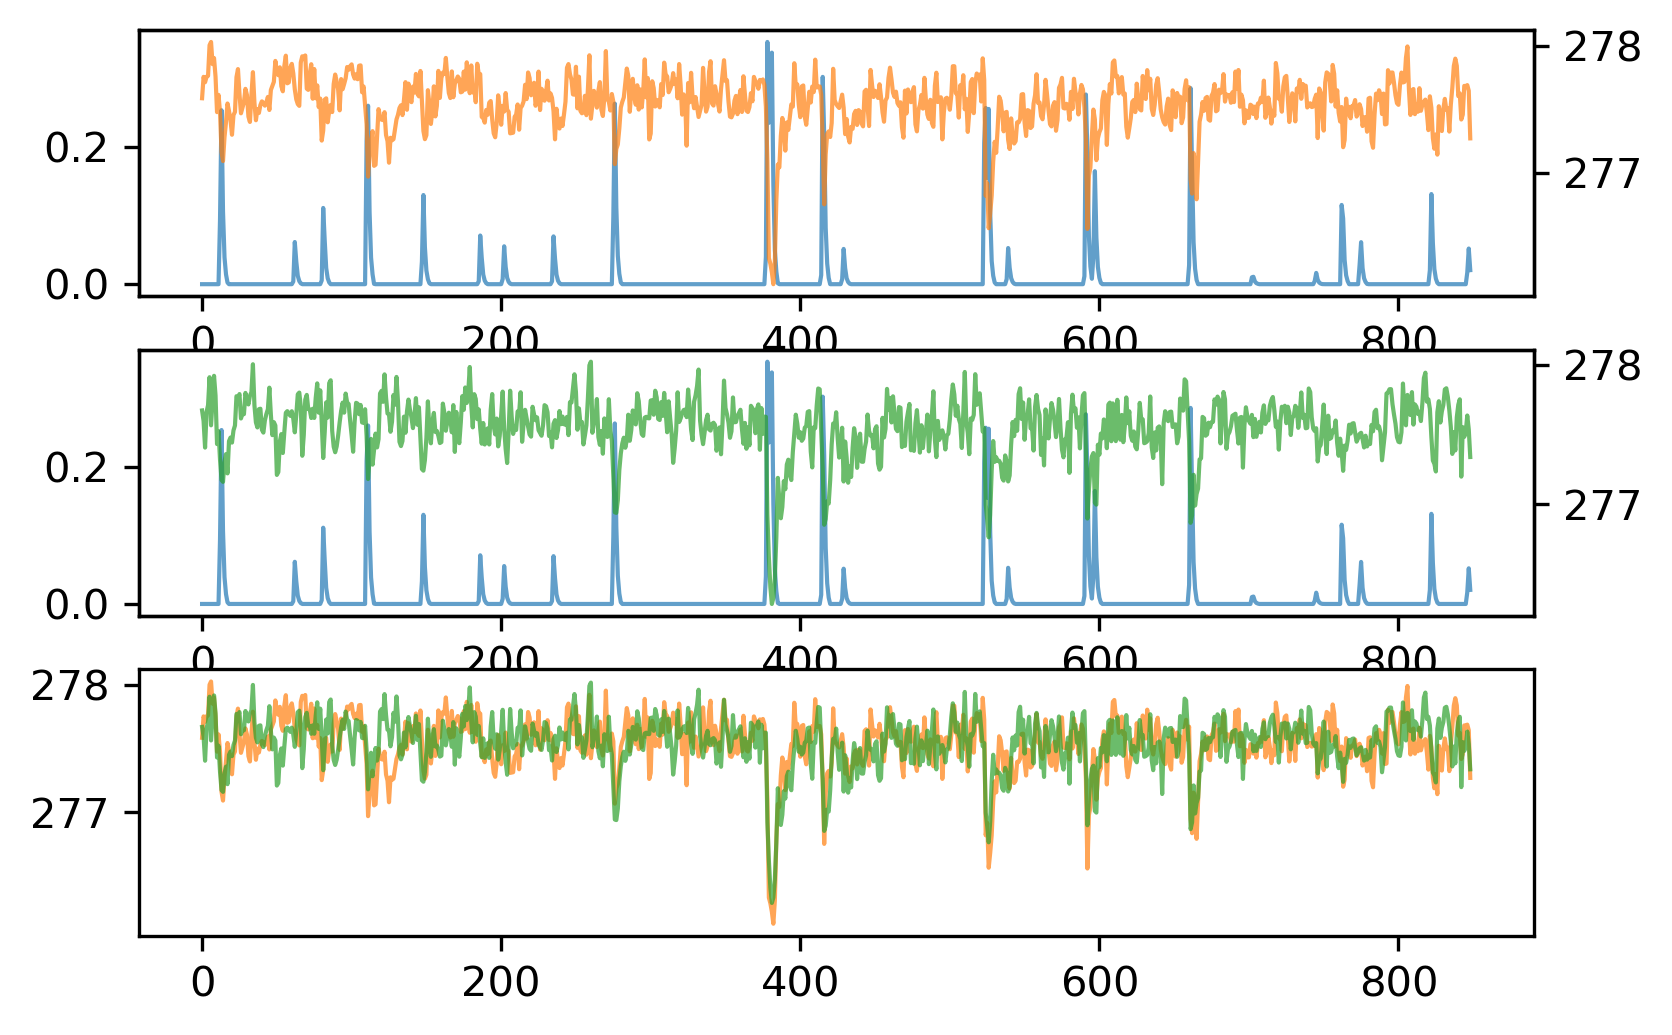

In [8]:
ds_volc = xr.open_dataset('../data/Volc_Forc_AOD_1st_mill.nc')
ds_temp_r1 = xr.open_dataset('../data/T2m_R1_ym_1stMill.nc')
ds_temp_r2 = xr.open_dataset('../data/T2m_R2_ym_1stMill.nc')

mean_temp_r1 = np.mean(np.mean(ds_temp_r1.T2m.values, axis=1), axis=1)
std_temp_r1 = np.std(ds_temp_r1.T2m.values, axis=1)
mean_temp_r2 = np.mean(np.mean(ds_temp_r2.T2m.values, axis=1), axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, dpi=300)
ax1.plot(ds_volc.AOD.values.flatten()[150:], label='volc', linewidth=1, alpha=0.7)
ax1_twin = ax1.twinx()
ax1_twin.plot(mean_temp_r1[150:], color='C1', label='mean_temp_r1', linewidth=1, alpha=0.7)


ax2.plot(ds_volc.AOD.values.flatten()[150:], label='volc', linewidth=1, alpha=0.7)
ax2_twin = ax2.twinx()
ax2_twin.plot(mean_temp_r2[150:], color='C2', label='mean_temp_r2', linewidth=1, alpha=0.7)

ax3.plot(mean_temp_r1[150:], color='C1', label='mean_temp_r1', linewidth=1, alpha=0.7)
ax3.plot(mean_temp_r2[150:], color='C2', label='mean_temp_r2', linewidth=1, alpha=0.7)

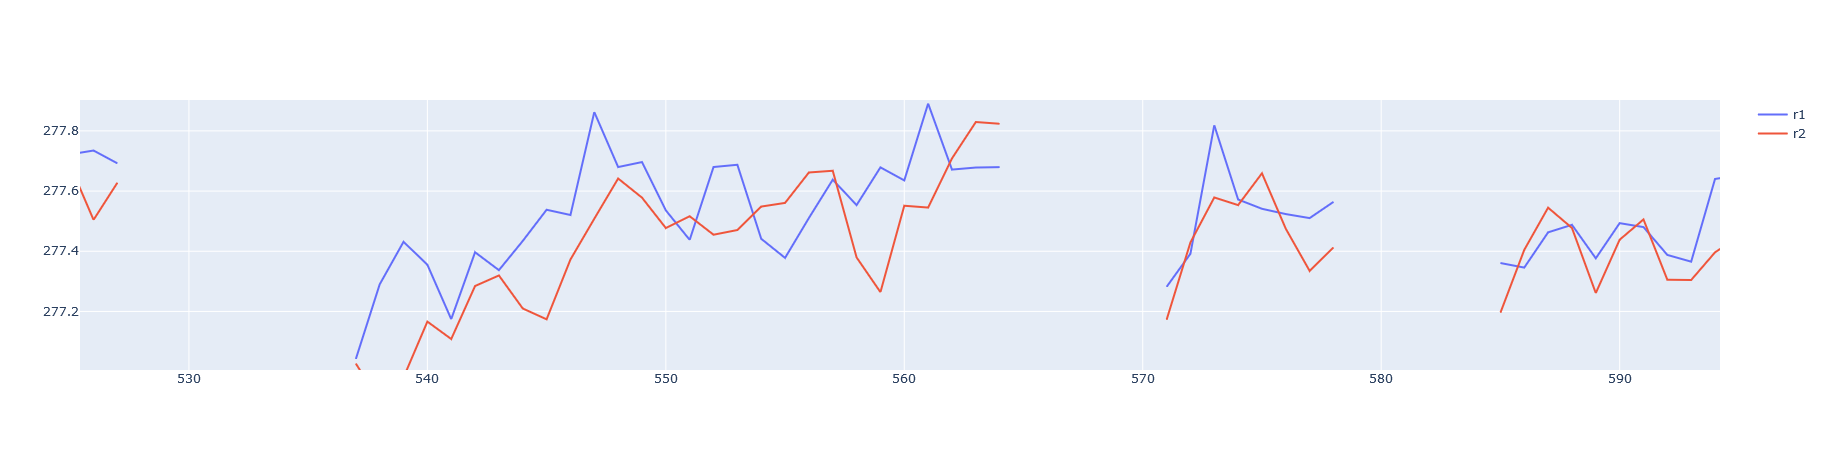

In [59]:
# only 138 years with nonzero AOD
years = np.arange(1, 1000, 1)
volcanic_boolean_array = np.ones(np.shape(ds_volc.AOD.values.flatten()), dtype=bool)
volcanic_boolean_array[np.nonzero(ds_volc.AOD.values.flatten())] = 0

remaining_temp_r1 = mean_temp_r1
remaining_temp_r1[volcanic_boolean_array == False] = None
remaining_temp_r2 = mean_temp_r2
remaining_temp_r2[volcanic_boolean_array == False] = None

#df = pd.DataFrame({'remaining_temp_r1': remaining_temp_r1, 'remaining_temp_r2': remaining_temp_r2, 'years': years})
fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=remaining_temp_r1, name='r1'))
fig.add_trace(go.Scatter(x=years, y=remaining_temp_r2, name='r2'))
fig.show()

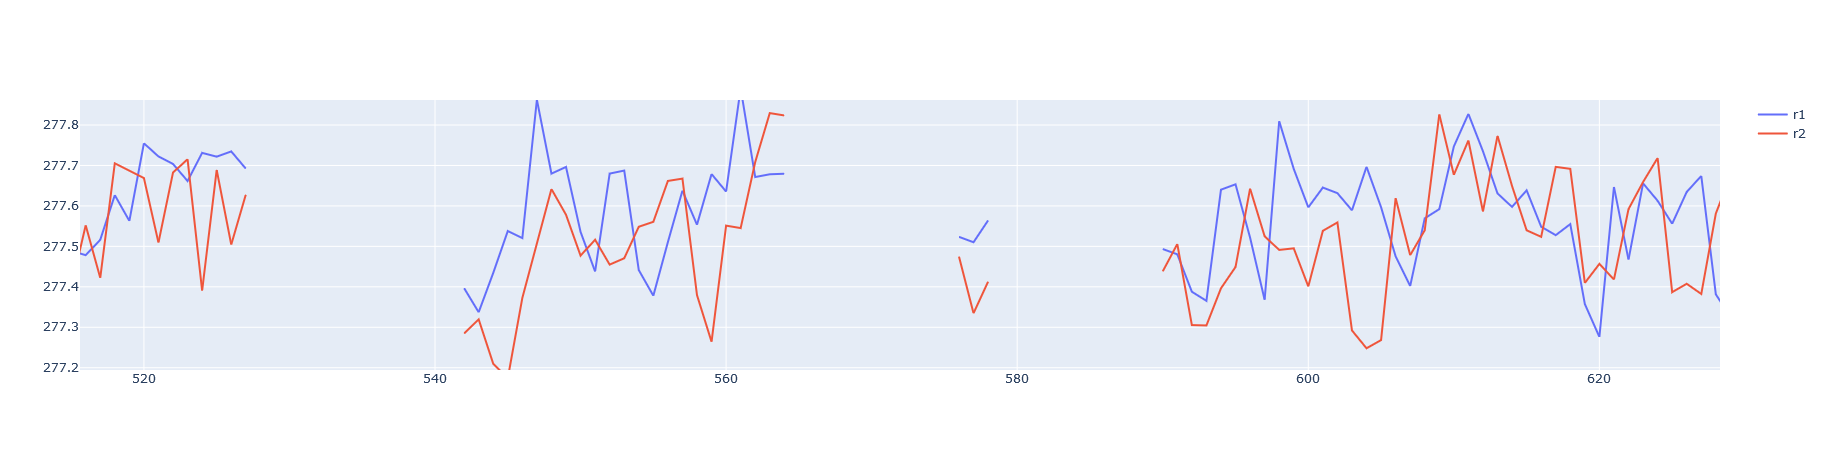

In [99]:
# +5 years after each eruption being removed
eruption_years = np.nonzero(ds_volc.AOD.values.flatten())[0]
years_to_be_removed = []
for yr in eruption_years:
    years_to_be_removed.append(np.arange(yr, yr+6, 1))
years_to_be_removed = np.asarray(years_to_be_removed)
years_to_be_removed = years_to_be_removed.reshape((np.shape(years_to_be_removed)[0]*np.shape(years_to_be_removed)[1]))
years_to_be_removed.sort()
years_to_be_removed = [x[0] for x in groupby(years_to_be_removed)]
years_to_be_removed = np.asarray(years_to_be_removed)
years_to_be_removed = years_to_be_removed[years_to_be_removed < 999]

remaining_temp_r1 = mean_temp_r1
remaining_temp_r1[years_to_be_removed] = None
remaining_temp_r2 = mean_temp_r2
remaining_temp_r2[years_to_be_removed] = None

#df = pd.DataFrame({'remaining_temp_r1': remaining_temp_r1, 'remaining_temp_r2': remaining_temp_r2, 'years': years})
fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=remaining_temp_r1, name='r1'))
fig.add_trace(go.Scatter(x=years, y=remaining_temp_r2, name='r2'))
fig.show()